<a href="https://colab.research.google.com/github/ElwinGao4444/colab/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib介绍
(官方文档：https://matplotlib.org/stable/api/index)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 查看当前环境中的字库
from matplotlib.font_manager import FontManager

fm = FontManager()
myfont = set(f.name for f in fm.ttflist)
myfont

In [ ]:
# 以下配置根据情况需要选择性的配置即可

# 内嵌画图（一般用户jupyter中）
%matplotlib inline

# 运行时参数
# https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams
plt.rcParams['font.sans-serif']='SimHei'  # 允许再图片中显示中文
plt.rcParams['axes.unicode_minus']=False  # 允许再图片中显示负数

# 支持SVG矢量图
%config InlineBackend.figure_format='svg'

# 基本用法

## 简单绘制

In [10]:
# 基本绘图
plt.plot()  # 默认情况下，即使不主动调用show()，也会在执行结束时，隐式调用show()
plt.close() # 如果在调用show()之前，提前调用close()，则不会进行图像绘制

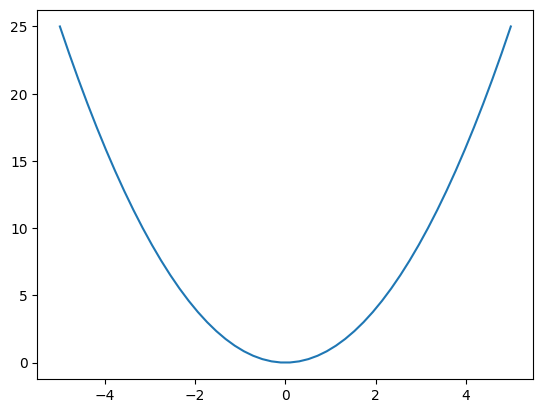

In [ ]:
# 绘制抛物线
x = np.linspace(-5,5,50)
y = x**2
plt.plot(x,y)

## 样式与颜色

（样式：https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html ）

（颜色：https://matplotlib.org/stable/tutorials/colors/colors.html ）

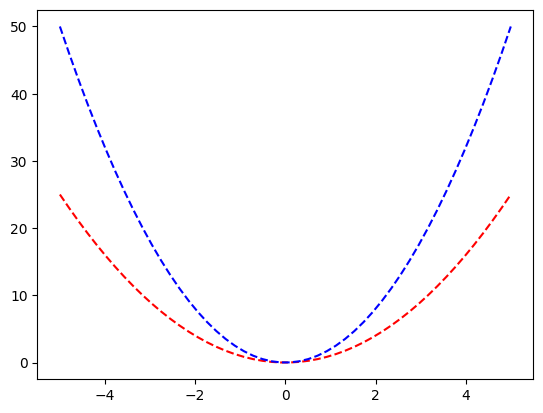

In [ ]:
x = np.linspace(-5,5,50)
plt.plot(x,x**2, color='red', ls='dashed')  # 标准参数模式
plt.plot(x,x**2*2, 'b--') # 简写模式

## 画布配置

### 基本配置

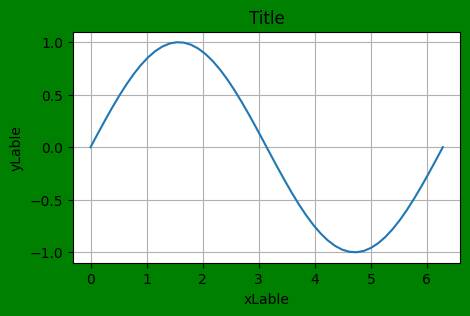

In [9]:
# figsize：画布的长宽
# dpi：分辨率（像素密度）
# facecolor：背景颜色
plt.figure(figsize=(5,3), dpi=100, facecolor='green') # 可以直接通过plt做全局设置
plt.grid()  # 设置网格
plt.gca().set(title='Title', xlabel='xLabel', ylabel='yLabel')  # 也可以通过gca(get current axes)来使用axes的set方法进行设置

x = np.linspace(0,2*np.pi)
plt.plot(x,np.sin(x))

### 多图绘制

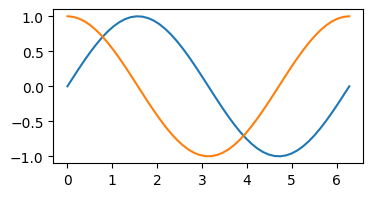

In [ ]:
# 一个画布上画多张图
plt.figure(figsize=(4,2))
x = np.linspace(0,2*np.pi)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

### 分图绘制

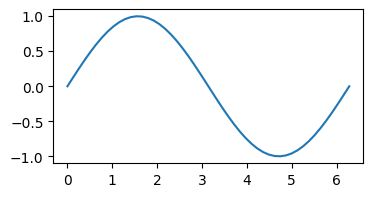

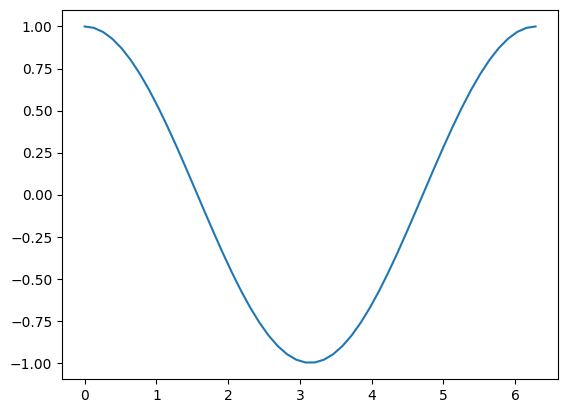

In [ ]:
# 将不同的线画到不同的画布
plt.figure(figsize=(4,2))
x = np.linspace(0,2*np.pi)
plt.plot(x,np.sin(x))
plt.show()  # show()会立即绘制，并清空所有配置&数据
plt.plot(x,np.cos(x))

## 多图布局

### 4图布局（2x2）

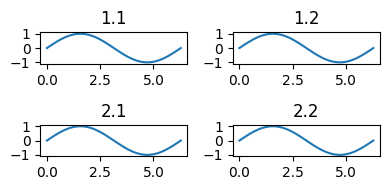

In [ ]:
fig = plt.figure(figsize=(4,2))
x = np.linspace(0,2*np.pi)

# subplot参数中的221，表示2行2列中的第1个子图
# 另一种表达方式是：2,2,1，相比221表达更加清晰
sp1 = plt.subplot(221)
sp1.set_title('1.1')
sp1.plot(x,np.sin(x))

sp2 = plt.subplot(222)
sp2.set_title('1.2')
sp2.plot(x,np.sin(x))

sp3 = plt.subplot(2,2,3)
sp3.set_title('2.1')
sp3.plot(x,np.sin(x))

sp4 = plt.subplot(2,2,4)
sp4.set_title('2.2')
sp4.plot(x,np.sin(x))

fig.tight_layout()  # 处理子图之间相互遮挡的问题

### 3图布局（2+1）

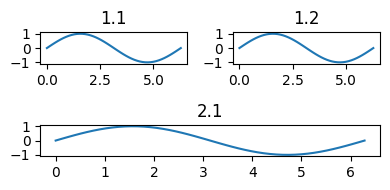

In [ ]:
fig = plt.figure(figsize=(4,2))
x = np.linspace(0,2*np.pi)

# subplot参数中的221，表示2行2列中的第1个子图
# 另一种表达方式是：2,2,1，相比221表达更加清晰
sp1 = plt.subplot(221)
sp1.set_title('1.1')
sp1.plot(x,np.sin(x))

sp2 = plt.subplot(222)
sp2.set_title('1.2')
sp2.plot(x,np.sin(x))

sp3 = plt.subplot(2,1,2)  # 子图可以根据需要，决定每行怎么分割
sp3.set_title('2.1')
sp3.plot(x,np.sin(x))

fig.tight_layout()  # 处理子图之间相互遮挡的问题

### 9图布局（3x3）

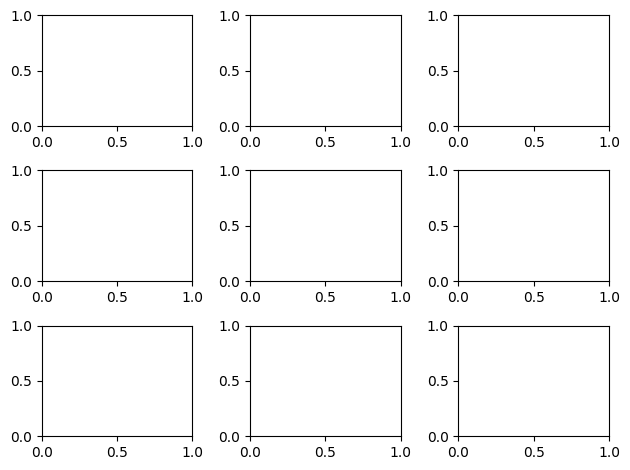

In [ ]:
# 多图布局的另一种方法
fig, ax = plt.subplots(3,3)
ax1,ax2,ax3 = ax
ax11,ax12,ax13 = ax1
ax21,ax22,ax23 = ax2
ax31,ax32,ax33 = ax3
fig.tight_layout()

## 图形嵌套

### 相对定位

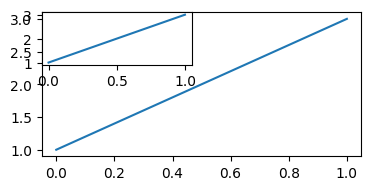

In [ ]:
fig = plt.figure(figsize=(4,2))
x = np.linspace(0,2*np.pi)

s1 = fig.add_subplot(1,1,1)
s1.plot([0,1],[1,3])

# 嵌套子图
s2 = fig.add_subplot(2,2,1)
s2.plot([0,1],[1,3])

### 绝对定位

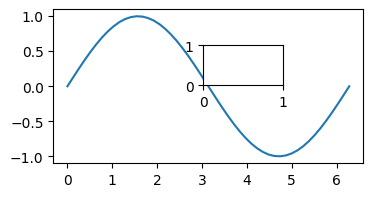

In [ ]:
fig = plt.figure(figsize=(4,2))
x = np.linspace(0,2*np.pi)

plt.plot(x,np.sin(x))

# 嵌套子图（四个元素分别表示：[left, bottom, width, height]）
s1 = plt.axes([0.5,0.5,0.2,0.2])

## 双轴显示

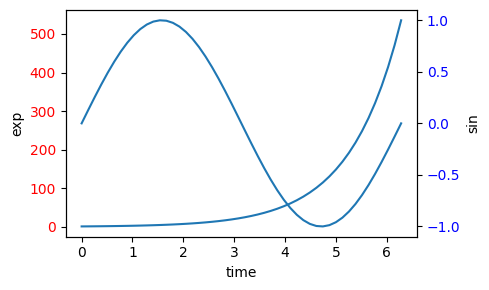

In [ ]:
fig = plt.figure(figsize=(5,3))
x = np.linspace(0,2*np.pi)

axes1 = plt.gca() # 得到当前轴域
axes1.plot(x, np.exp(x))
axes1.set_xlabel('time')
axes1.set_ylabel('exp')
axes1.tick_params(axis='y', labelcolor='red')

axes2 = axes1.twinx() # 与axes1共享x轴
axes2.plot(x, np.sin(x))
axes2.set_ylabel('sin')
axes2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()